Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
# import package 
library(tidymodels)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.0     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [6]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 8, 1, 13, 5, 5, 3, 6, 10,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 99, 97, 145, 117,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 84, 66, 82, 92, 75, 58…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 0, 15, 19, 0, 26, 11, 0, …
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 0, 140, 110, 0, 0, 54, 0, …
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.3…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 50, 22, 57, 38, 60, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable `Outcome`

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description                                                              |
| :---------- | :----------------------------------------------------------------------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2)                           |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

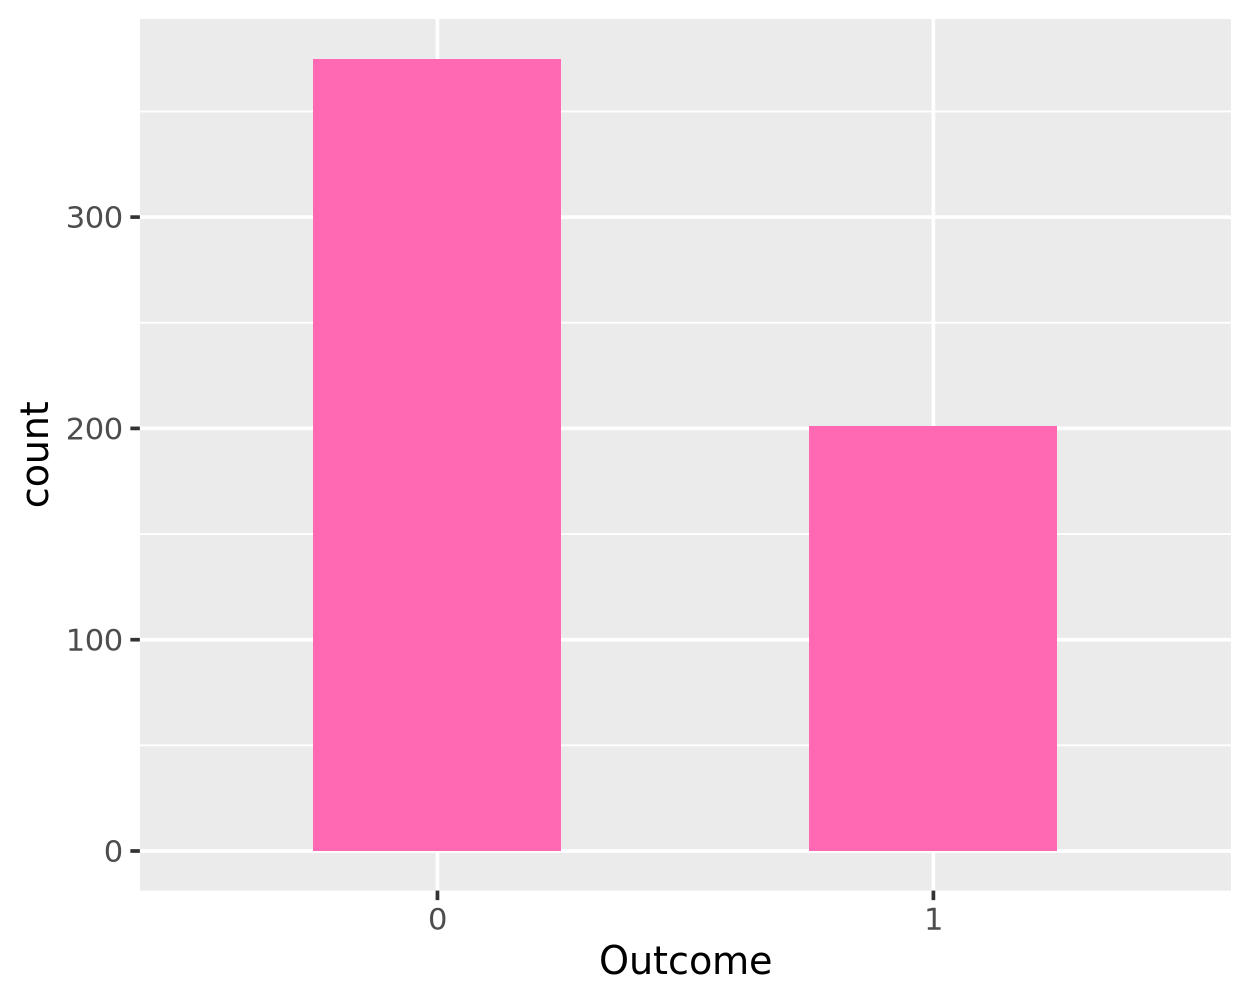

In [12]:
ggplot(data = diabetes_train, mapping = aes(x = Outcome)) + geom_bar(fill = "hotpink", width=0.5)

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No. There are twice as many non diabetes outcome as outcomes with diabetes.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [13]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

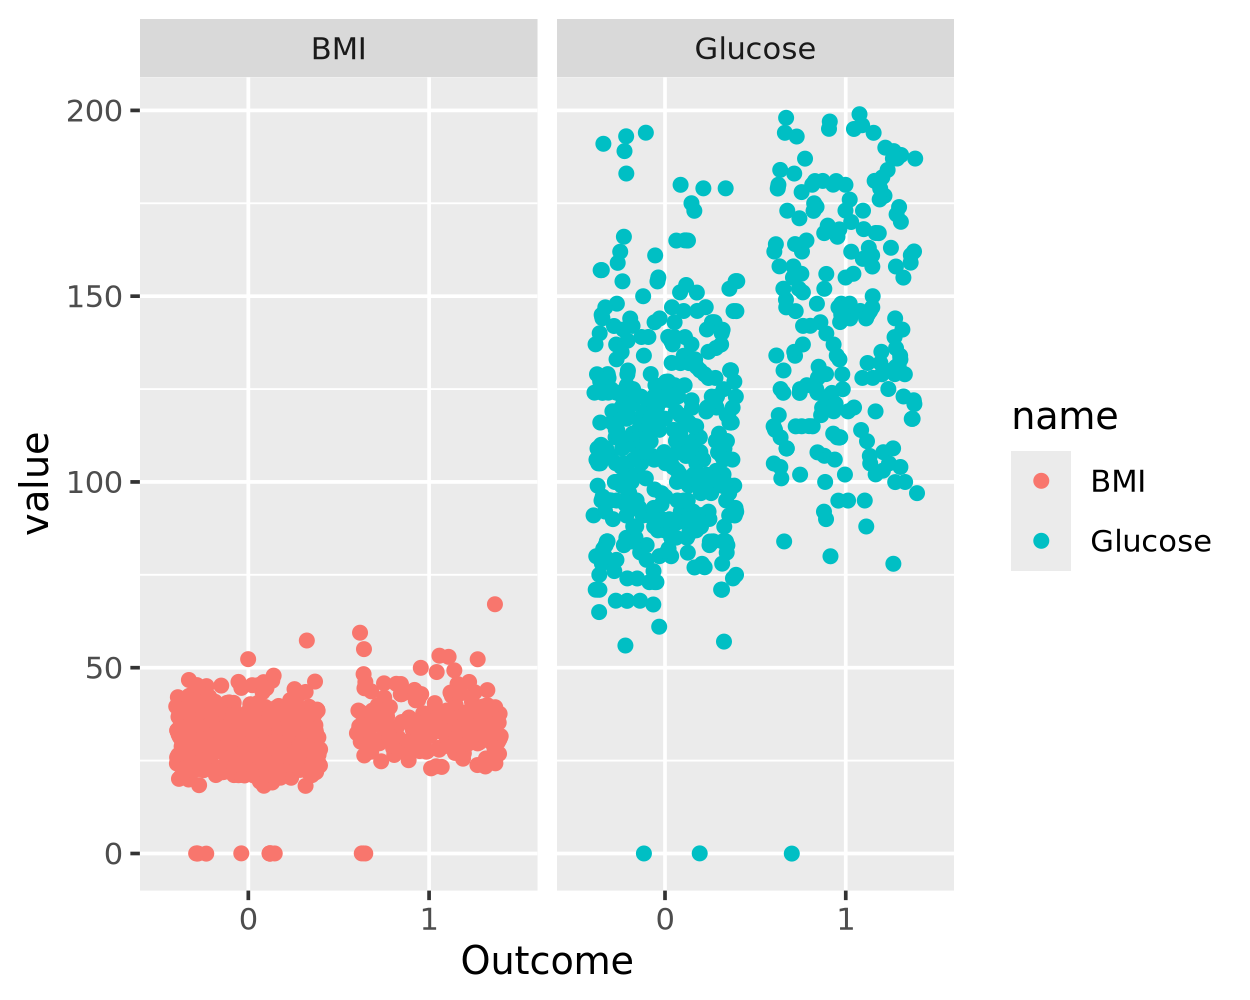

In [26]:
ggplot(data = plot_df, mapping = aes(x = Outcome, y = value, color = name)) + geom_jitter() + facet_wrap(~name, ncol = 2, scales = 'free_x')

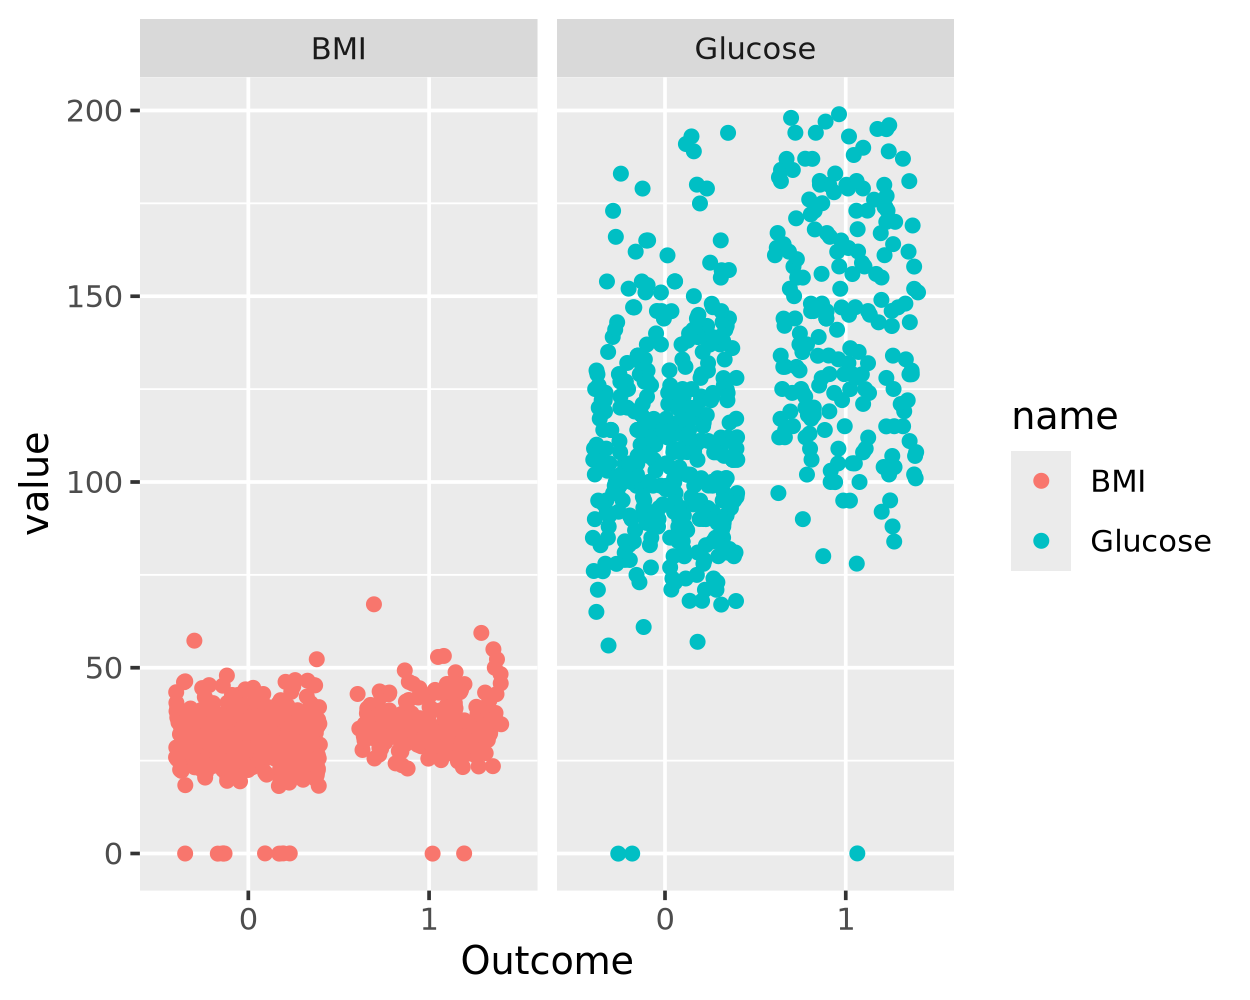

In [27]:
ggplot(data = plot_df, mapping = aes(x = Outcome, y = value, color = name)) + geom_jitter() + facet_wrap(~name, ncol = 2)

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

`scales = 'free_x'` denotes that the y-axis is fixed but the x-axis is free. For this particular data removing this contraint does little to impact the visualization 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [41]:
mod = logistic_reg() |> set_engine('glm')
diabetes_model = mod |> fit(Outcome ~ BMI + Glucose,
                      data = diabetes_train)
tidy(diabetes_model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.04858896,0.673069651,-10.472302,1.157918e-25
BMI,0.06268238,0.014622374,4.286745,1.813106e-05
Glucose,0.03484507,0.003738085,9.321637,1.145594e-20


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [44]:
diabetes_test_wPred = augment(diabetes_model, diabetes_test)
diabetes_test_wPred|> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.41267997,0.5873200,5,166,72,19,175,25.8,0.587,51,1
0,0.67817557,0.3218244,1,103,30,38,83,43.3,0.183,33,0
0,0.54852009,0.4514799,3,126,88,41,235,39.3,0.704,27,0
1,0.09314689,0.9068531,7,196,90,0,0,39.8,0.451,41,1
0,0.67776808,0.3222319,10,125,70,26,115,31.1,0.205,41,1
0,0.87600928,0.1239907,4,103,60,33,192,24.0,0.966,33,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [45]:
diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 115  31
         1  10  36

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

- 67 had diabetes
- 36 were correctly predicted (True Positive)
- 10 predicted to have diabetes did not (False Positive)